# Visualizing The Gender Gap in College Degrees
---
[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). 

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/) that there is a gap.

### Prerequisite

In [1]:
#Importing the required library and command
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the CSV file
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

### Converting Colorblind Friendly Colors

In [17]:
#Assigning colorblind friendly colors into variables
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey=(171/255,171/255,171/255)

### Plotting

#### 1. STEM Majors Only

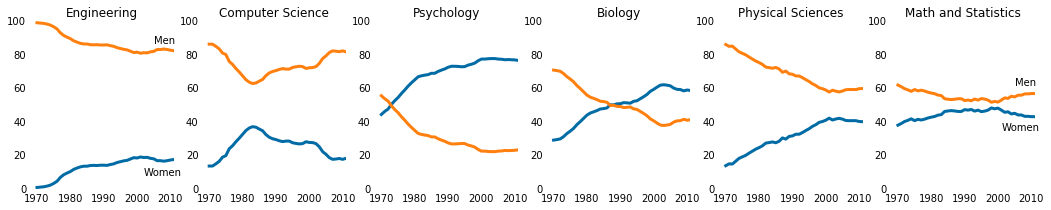

In [4]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology',
             'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    #Plotting for female
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label='Women', linewidth=3)
   
    #Plotting for male
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men', linewidth=3)
    
    #Turning of spines
    for i in ('right','bottom','left','top'):
        ax.spines[i].set_visible(False)
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(right='off', left='off', bottom='off', top='off')
    
    #Creating text on the first and last graph
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

#### 2. Across Three Majors

##### Sorting Each Major's Column Based on Gender Gap

In [5]:
stem = ['Biology', 'Computer Science', 'Engineering', 
        'Math and Statistics', 'Physical Sciences', 'Psychology']

lib_arts = ['Art and Performance', 'Communications and Journalism', 
            'English', 'Foreign Languages', 'Social Sciences and History']

other = ['Agriculture', 'Architecture', 'Business', 'Education', 
         'Health Professions', 'Public Administration']

In [6]:
#Parsing the column names into a separate sorted list
stem_cats = list(women_degrees[stem].sort_values(
    women_degrees[stem].shape[0] - 1, axis=1, ascending=False).columns)

lib_arts_cats= list(women_degrees[lib_arts].sort_values(
    women_degrees[lib_arts].shape[0] - 1, axis=1, ascending=False).columns)

other_cats= list(women_degrees[other].sort_values(
    women_degrees[other].shape[0] - 1, axis=1, ascending=False).columns)

In [7]:
print(stem_cats)
print(lib_arts_cats)
print(other_cats)

['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']


##### Join Diagram

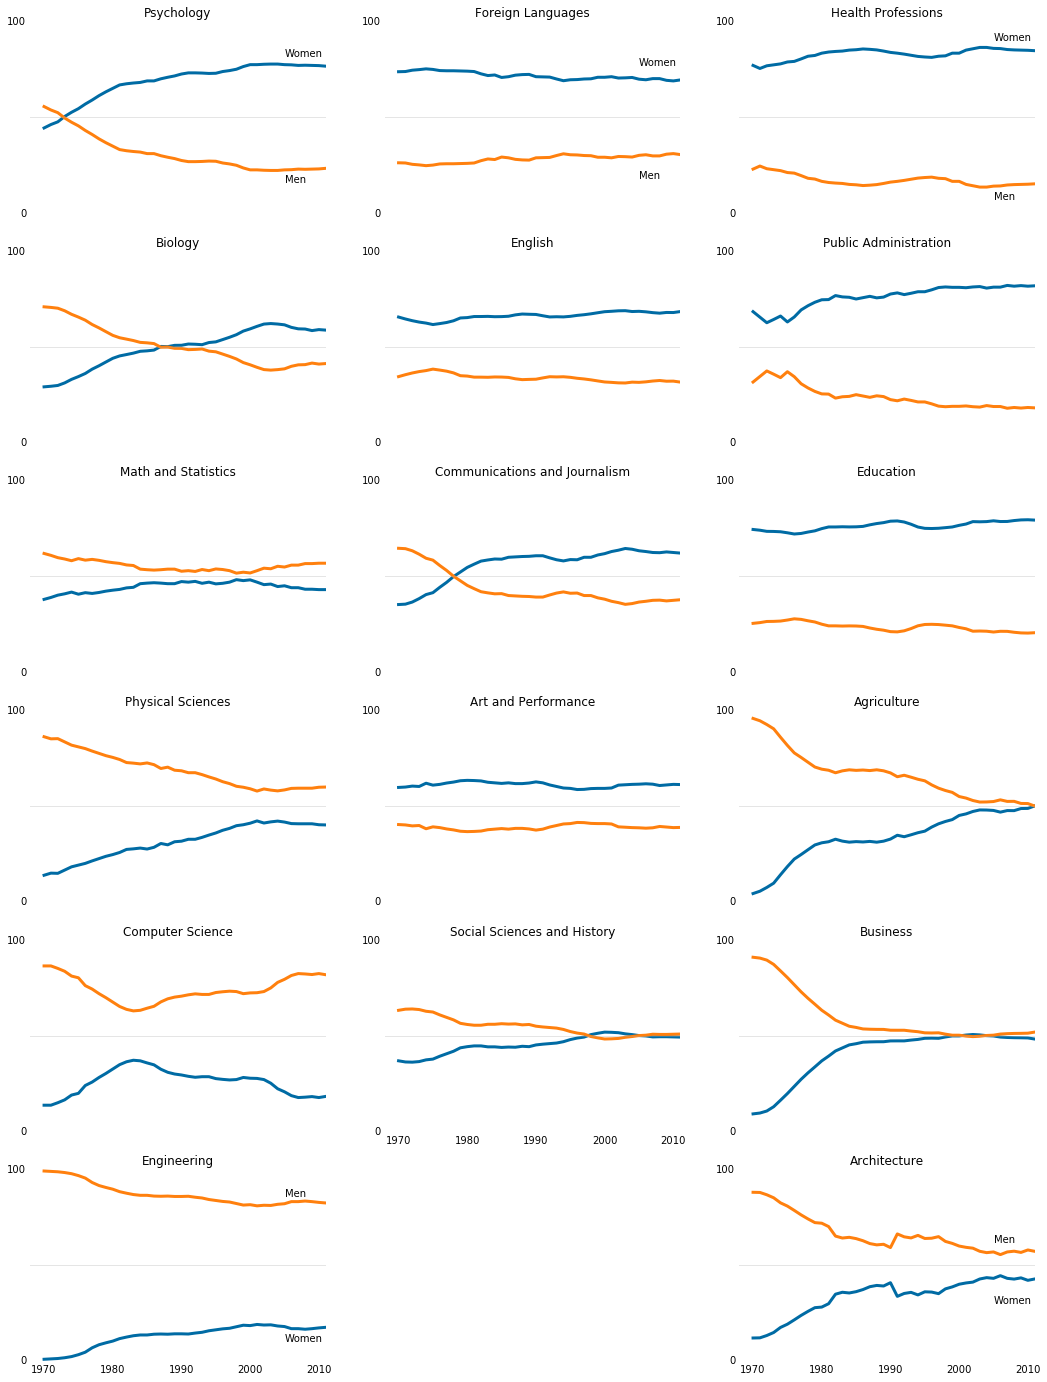

In [23]:
fig = plt.figure(figsize=(18, 24))
stem=0
lib=0
oth=0

for sp in range(0,18):
    
    #Plotting for stem major
    if sp%3==0:
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[stem_cats[stem]], 
                c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[stem]], 
                c=cb_orange, label='Men', linewidth=3)
        ax.set_title(stem_cats[stem])
        stem+=1
        if sp == 0:
            ax.text(2005, 82, 'Women')
            ax.text(2005, 16, 'Men')
        elif sp == 15:
            ax.text(2005, 86, 'Men')
            ax.text(2005, 10, 'Women')
   
    #Plotting for lib_arts major
    elif sp%3==1:
        if lib==len(lib_arts_cats):continue
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[lib]], 
                c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[lib]], 
                c=cb_orange, label='Men', linewidth=3)
        ax.set_title(lib_arts_cats[lib])
        lib+=1
        if sp == 1:
            ax.text(2005, 77, 'Women')
            ax.text(2005, 18, 'Men')
    
    #Olotting for other majors
    elif sp%3==2:
        ax = fig.add_subplot(6,3,sp+1)
        if sp==16:print("here")
        ax.plot(women_degrees['Year'], women_degrees[other_cats[oth]], 
                c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[oth]], 
                c=cb_orange, label='Men', linewidth=3)
        ax.set_title(other_cats[oth])
        oth+=1
        if sp == 2:
            ax.text(2005, 90, 'Women')
            ax.text(2005,7, 'Men')
        if sp==17:
            ax.text(2005, 62, 'Men')
            ax.text(2005, 30, 'Women')
    
    for key, spine in ax.spines.items():
            spine.set_visible(False)
            
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    
    #Make ticks disappear, labelbottom off is to turn ticklabel off
    ax.tick_params(bottom="off", top="off", left="off", 
                   right="off",labelbottom="off") 
    
    #Creating a horizontal line at y=50, alpha denotes the transparency
    ax.axhline(50,c=cb_grey,alpha=0.3)
    
    if sp in range(15,18) or sp==13:
        ax.tick_params(labelbottom="on")

plt.show()

#saving plot
fig.savefig('gender_degrees.png') 